# Assignment 4
The objective of this assignment is to implement Perceptron and Logistic Regression algorithms from scratch and to understand their functionalities through practical implementation.




## Task 1 : Implementing Perceptron (30 points)


**1. Create a simple dataset like this to train and test the Perceptron**
 ```python
from sklearn.datasets import make_classification

# Generate linearly separable dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=2.0, random_state=42)

 ```
 
**2. Implement functions for training and predicting using the Perceptron.**

**3. Display the decision boundary of the trained Perceptron.** *for displaying boundary you can use plot_decision_regions() function from the notebook*

C:\Users\maahi\AppData\Local\Temp\ipykernel_8\317185258.py:40: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


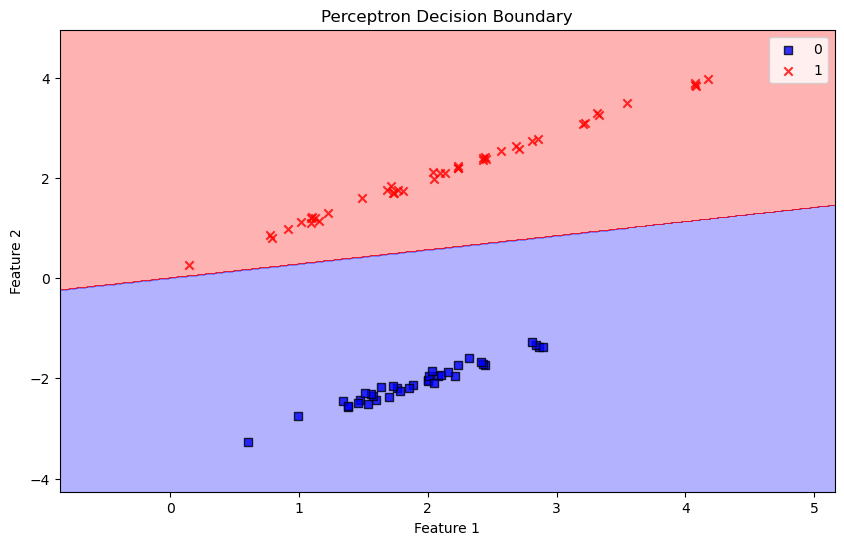

In [1]:
# your code goes here
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import numpy as np

# perceptron functions
def pPredict(classifier, X):
    # Using a trained perceptron classifier, predict the class labels for the input data
    return classifier.predict(X)

def pTrain(X_train, y_train):
    # training the Perceptron
    pn = Perceptron(max_iter=50, eta0=0.1, random_state=42)
    pn.fit(X_train, y_train)
    return pn

# from ipynb on canvas
def plotDecision(X, y, classifier, resolution=0.02, test_idx=None):
    # setup color map and marker generator
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('blue', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    dx1, dx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([dx1.ravel(), dx2.ravel()]).T)
    Z = Z.reshape(dx1.shape)
    plt.contourf(dx1, dx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(dx1.min(), dx1.max())
    plt.ylim(dx2.min(), dx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')

# generate dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=2.0, random_state=42)

# split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train perceptron
perceptron = pTrain(X_train, y_train)

# plot decision
plt.figure(figsize=(10, 6))
plotDecision(X_train, y_train, classifier=perceptron)
plt.title('Perceptron Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.show()

## Task 2: Evaluating Perceptron Performance (20 points)


**1. Evaluate the performance of the implemented Perceptron using accuracy metric.**


**2. Report the accuracy of the Perceptron on both training and testing datasets.**


In [2]:
# your code goes here

# predictions using trained perceptron on the split dataset
y_test_pred = pPredict(perceptron, X_test)
y_train_pred = pPredict(perceptron, X_train)

# calculations on accuracy of the split datasets
test_accuracy = accuracy_score(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)

print("Training data accuracy:", train_accuracy, "\nTesting data accuracy:", test_accuracy)

Training data accuracy: 1.0 
Testing data accuracy: 1.0


## Task 3: Implementing Logistic Regression (30 points)

**1. Use the same dataset as in Task 1 to train and test the Logistic Regression model.**

**2. Implement functions for training and predicting using Logistic Regression.**

**3. Display the decision boundary of the trained Logistic Regression model.**
*for displaying boundary you can use plot_decision_regions() function from the notebook*

C:\Users\maahi\AppData\Local\Temp\ipykernel_8\4290116841.py:40: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


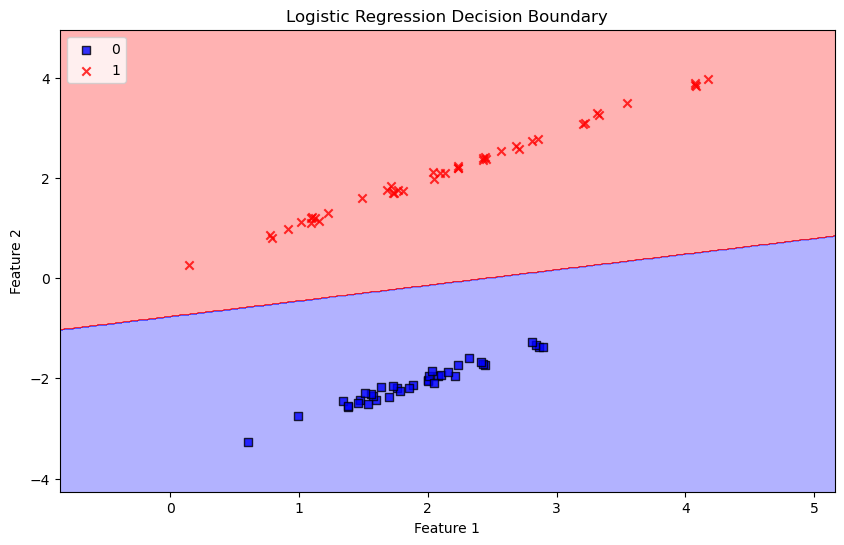

In [3]:
# your code goes here
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# perceptron functions
def lrPredict(classifier, X):
    # Using the trained logostic Reg
    return classifier.predict(X)

def lrTrain(X_train, y_train):
    # training the Perceptron
    LR = LogisticRegression(random_state=42)
    LR.fit(X_train, y_train)
    return LR

# from ipynb on canvas
def plotDecision(X, y, classifier, resolution=0.02, test_idx=None):
    # setup color map and marker generator
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('blue', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    dx1, dx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([dx1.ravel(), dx2.ravel()]).T)
    Z = Z.reshape(dx1.shape)
    plt.contourf(dx1, dx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(dx1.min(), dx1.max())
    plt.ylim(dx2.min(), dx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')

# generate dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=2.0, random_state=42)

# split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train perceptron
logReg = lrTrain(X_train, y_train)

# plot decision
plt.figure(figsize=(10, 6))
plotDecision(X_train, y_train, classifier=logReg)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.show()


## Task 4: Evaluating Logistic Regression Performance (20 points)

**1. Evaluate the performance of the implemented Logistic Regression using accuracy metric.**

**2. Report the accuracy of the Logistic Regression on both training and testing datasets.**


In [5]:
# your code goes here

# predictions using trained logistic regression on the split dataset
y_test_pred = pPredict(logReg, X_test)
y_train_pred = pPredict(logReg, X_train)

# calculations on accuracy of the split datasets
test_accuracy = accuracy_score(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)

print("Training data accuracy:", train_accuracy, "\nTesting data accuracy:", test_accuracy)


Training data accuracy: 1.0 
Testing data accuracy: 1.0


## Bonus Task (Extra 10 points):
**Compare the performance of Perceptron and Logistic Regression on a more complex dataset.**
**Discuss the reasons behind the observed differences in performance.**

In [11]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

# Generate a more complex dataset
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Perceptron
perceptron = Perceptron(max_iter=50, eta0=0.1, random_state=42)
perceptron.fit(X_train, y_train)

# Plot decision boundary for Perceptron
# plt.figure(figsize=(10, 6))
# plot_decision_regions(X_train, y_train, classifier=perceptron)
# plt.title('Perceptron Decision Boundary')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.legend(loc='upper right')
# plt.show()

# Evaluate Perceptron
y_test_pred = perceptron.predict(X_test)
y_train_pred = perceptron.predict(X_train)
test_accuracy_perceptron = accuracy_score(y_test, y_test_pred)
train_accuracy_perceptron = accuracy_score(y_train, y_train_pred)

print("Perceptron:")
print("Training data accuracy:", train_accuracy_perceptron)
print("Testing data accuracy:", test_accuracy_perceptron)

# Train Logistic Regression
logReg = LogisticRegression(random_state=42)
logReg.fit(X_train, y_train)

# Plot decision boundary for Logistic Regression
# plt.figure(figsize=(10, 6))
# plot_decision_regions(X_train, y_train, classifier=logReg)
# plt.title('Logistic Regression Decision Boundary')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.legend(loc='upper left')
# plt.show()

# Evaluate Logistic Regression
y_test_pred = logReg.predict(X_test)
y_train_pred = logReg.predict(X_train)
test_accuracy_logReg = accuracy_score(y_test, y_test_pred)
train_accuracy_logReg = accuracy_score(y_train, y_train_pred)

print("\nLogistic Regression:")
print("Training data accuracy:", train_accuracy_logReg)
print("Testing data accuracy:", test_accuracy_logReg)

'''
Perceptron training was less accurate than Logistic Regressions training. Perceptron was 73% and LR was 82% accurate.
Perceptron testing was less accurate than Logistic Regressions testing. Perceptron was 95% and LR was 100% accurate.

The Perceptron model is less accurate than the Logistic Regression model 
because the Perceptron model is a linear classifier and the Logistic Regression model is a non-linear classifier.

The peceptron uses the perceptron loss function which updates the weights based on the error of the prediction. This 
can cause slower convergence and less accurate predictions. The logistic regression model uses the logistic loss function 
which is better for probabilistic predictions and can be more accurate than the perceptron loss function. 

The perceptrons decision boundary is linear and can only classify linearly separable data. The logistic regression model 
can classify non-linear data because it uses the logistic function to make predictions. This allows the logistic regression 
model to be more flexible and make more accurate predictions than the perceptron model.

Lastly, LR is usually better at generalizing unseen data compared to perceptron.
'''


Perceptron:
Training data accuracy: 0.7375
Testing data accuracy: 0.95

Logistic Regression:
Training data accuracy: 0.825
Testing data accuracy: 1.0
